# MINI PROJECT: Investigation on The Effectivenness of Vaccination on COVID-19

## Sub Prob 3: What is trend of COVID-19 Cases Respect to Diffrent Races with Vaccination ?

## Data Resourcing & Exploration : Feng Rong
## Exploration, Cleaning & Regression : Seungho Lee

In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

Due to the limited data variables of the main dataset, we have decided find and to merge two datasets accroding to same 'Dates' and 'Race/ethnicity'.

## Dataset 1 : Total Cases

In [8]:
covid19_data = pd.read_csv('dataset/COVID-19_Cases_and_Deaths_by_Race_Ethnicity_-_ARCHIVE (1).csv')
covid19_data.head()

,Date updated,Race/ethnicity,Total population,Total cases,Crude case rate per 100k,Age adjusted case rate per 100k,Total deaths,Crude death rate per 100k,Age adjusted death rate per 100k
0,06/30/2020,Hispanic,589809.0,8810,1493.0,1695.0,374,63.0,119.0
1,06/30/2020,NH American Indian or Alaskan Native,9566.0,46,481.0,527.0,2,21.0,NaN
2,06/30/2020,NH Asian or Pacific Islander,177966.0,677,379.0,388.0,46,26.0,38.0
3,06/30/2020,NH Black,387134.0,6108,1577.0,1600.0,641,166.0,194.0
4,06/30/2020,NH Multiracial,NaN,128,NaN,NaN,27,NaN,NaN


In [9]:
covid19_data = covid19_data.rename(columns={'Date updated' : 'Date'})

In [10]:
print(covid19_data.dtypes)

Date                                 object
Race/ethnicity                       object
Total population                    float64
Total cases                           int64
Crude case rate per 100k            float64
Age adjusted case rate per 100k     float64
Total deaths                          int64
Crude death rate per 100k           float64
Age adjusted death rate per 100k    float64
dtype: object


From Data1, we extracted below three variables.

In [11]:
covid19_data_clean = pd.DataFrame(covid19_data[[
       'Date', 'Race/ethnicity', 
        'Total cases']])

In [12]:
covid19_data_clean = covid19_data_clean.fillna(0)

In [13]:
pd.DataFrame(covid19_data_clean['Race/ethnicity'].value_counts())

,Race/ethnicity
Hispanic,546
NH Black,546
NH White,546
Unknown,546
NH Multiracial,545
NH American Indian or Alaskan Native,510
NH Asian or Pacific Islander,510
NH Other,307
0,14
NH Asian,1


### Finalized cleaning of Data2

In [14]:
# create new variables according to their race
hispanic_d1 = covid19_data_clean.loc[covid19_data_clean['Race/ethnicity'] == 'Hispanic']
nh_black_d1 = covid19_data_clean.loc[covid19_data_clean['Race/ethnicity'] == 'NH Black']
nh_white_d1 = covid19_data_clean.loc[covid19_data_clean['Race/ethnicity'] == 'NH White']
unknown_d1 = covid19_data_clean.loc[covid19_data_clean['Race/ethnicity'] == 'Unknown']
nh_multiracial_d1 = covid19_data_clean.loc[covid19_data_clean['Race/ethnicity'] == 'NH Multiracial']
american_indian_alaskan_d1 = covid19_data_clean.loc[covid19_data_clean['Race/ethnicity'] == 'NH American Indian or Alaskan Native']
nh_asian_pacific_islander_d1 = covid19_data_clean.loc[covid19_data_clean['Race/ethnicity'] == 'NH Asian or Pacific Islander']
nh_other_d1 = covid19_data_clean.loc[covid19_data_clean['Race/ethnicity'] == 'NH Other']

hispanic_d1

,Date,Race/ethnicity,Total cases
0,06/30/2020,Hispanic,8810
8,07/01/2020,Hispanic,8826
16,07/02/2020,Hispanic,8857
24,07/05/2020,Hispanic,8893
32,07/06/2020,Hispanic,8904
...,...,...,...
4036,06/20/2022,Hispanic,131835
4043,06/21/2022,Hispanic,131908
4050,06/22/2022,Hispanic,131997
4057,06/23/2022,Hispanic,132088


## Dataset 2 : Number Population with Full-Doses

From Dataset2, we are mainly using number of population with full-series(without Booster Dose) which is the column 'Series_Complete_Yes' 

In [18]:
covid19_data2 = pd.read_csv('dataset/COVID_19_Vaccination_Demographics_in_the_United_States_National.csv')
covid19_data2.head()

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,...,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days,Second_Booster_Vax_pct_agegroup,Second_Booster_Pop_Pct_known,Second_Booster_Pop_Pct_US,Second_Booster_Pop_Pct_known_Last14Days,Second_Booster,Second_Booster_Last14Days
0,10/26/2022,Ages_50-64_yrs,60363680,23.7,22.7,52800699,94.8,82.9,24.2,23.3,...,24.2,25.1,29690317.0,125315.0,32.5,34.8,34.8,42.1,9664133.0,519214.0
1,10/26/2022,Ages_<2yrs,455606,0.2,0.2,166951,5.9,2.2,0.1,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/26/2022,Ages_18-24_yrs,24710855,9.7,9.3,20083139,80.8,65.7,9.2,8.8,...,9.2,5.0,6900849.0,25154.0,NaN,NaN,NaN,NaN,NaN,NaN
3,10/26/2022,Ages_2-4_yrs,1147495,0.5,0.4,521381,9.5,4.3,0.2,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/26/2022,Ages_5-11_yrs,11149989,4.4,4.2,9115350,38.8,31.7,4.2,4.0,...,4.2,7.3,1468435.0,36608.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
print(covid19_data2.dtypes)

Date                                        object
Demographic_category                        object
Administered_Dose1                           int64
Administered_Dose1_pct_known               float64
Administered_Dose1_pct_US                  float64
Series_Complete_Yes                          int64
Administered_Dose1_pct_agegroup            float64
Series_Complete_Pop_pct_agegroup           float64
Series_Complete_Pop_Pct_known              float64
Series_Complete_Pop_Pct_US                 float64
Booster_Doses_Vax_pct_agegroup             float64
Booster_Doses_Pop_Pct_known                float64
Booster_Doses_Vax_Pct_US                   float64
Booster_Doses_Pop_Pct_known_Last14Days     float64
Booster_Doses_Yes                          float64
Booster_Doses_Yes_Last14Days               float64
Second_Booster_Vax_pct_agegroup            float64
Second_Booster_Pop_Pct_known               float64
Second_Booster_Pop_Pct_US                  float64
Second_Booster_Pop_Pct_known_La

Alike Data1, 'Date', 'Demographic_category'(which is race) and 'Series_Complete_Yes' are taken.

In [20]:
covid19_data2_clean = pd.DataFrame(covid19_data2[[
       'Date', 'Demographic_category', 'Series_Complete_Yes']])

covid19_data2_clean = covid19_data2_clean.fillna(0)

In [21]:
pd.DataFrame(covid19_data2_clean['Demographic_category'].value_counts())

,Demographic_category
Ages_50-64_yrs,683
Sex_known,683
Age_unknown,683
Race_eth_NHMultiracial,683
Race_eth_NHBlack,683
Ages_40-49_yrs,683
Sex_unknown,683
Ages_65+_yrs,683
Ages_<12yrs,683
Ages_<2yrs,683


### Finalized cleaning of Data2

In [22]:
hispanic_d2 = covid19_data2_clean.loc[covid19_data2_clean['Demographic_category'] == 'Race_eth_Hispanic']
hispanic_d2

,Date,Demographic_category,Series_Complete_Yes
17,10/26/2022,Race_eth_Hispanic,35451158
60,10/25/2022,Race_eth_Hispanic,35451158
88,10/24/2022,Race_eth_Hispanic,35450658
103,10/23/2022,Race_eth_Hispanic,35448400
141,10/22/2022,Race_eth_Hispanic,35447364
...,...,...,...
23054,12/17/2020,Race_eth_Hispanic,774
23092,12/16/2020,Race_eth_Hispanic,711
23124,12/15/2020,Race_eth_Hispanic,667
23165,12/14/2020,Race_eth_Hispanic,622


### Utilize merge function to merge Data 1 & 2

As mentioned earlier, key column during the merging is 'Date' as the time line trend has to be parallel. Below is one of the merged datasets

In [23]:
merged_hispanic = pd.merge(hispanic_d2, hispanic_d1, how='right', on = 'Date')
merged_hispanic = merged_hispanic.drop(columns="Demographic_category")
memerged_hispanic = merged_hispanic.fillna(0)
memerged_hispanic

,Date,Series_Complete_Yes,Race/ethnicity,Total cases
0,06/30/2020,0.0,Hispanic,8810
1,07/01/2020,0.0,Hispanic,8826
2,07/02/2020,0.0,Hispanic,8857
3,07/05/2020,0.0,Hispanic,8893
4,07/06/2020,0.0,Hispanic,8904
...,...,...,...,...
541,06/20/2022,34844142.0,Hispanic,131835
542,06/21/2022,34850219.0,Hispanic,131908
543,06/22/2022,34856621.0,Hispanic,131997
544,06/23/2022,34862632.0,Hispanic,132088


In [24]:
# merge rest of the race datasets
nh_black_d2 = covid19_data2_clean.loc[covid19_data2_clean['Demographic_category'] == 'Race_eth_NHBlack']
merged_black = pd.merge(nh_black_d2, nh_black_d1, how='right', on = 'Date')
merged_black = merged_black.drop(columns="Demographic_category")
merged_black = merged_black.fillna(0)

nh_white_d2 = covid19_data2_clean.loc[covid19_data2_clean['Demographic_category'] == 'Race_eth_NHWhite']
merged_white = pd.merge(nh_white_d2, nh_white_d1, how='right', on = 'Date')
merged_white = merged_white.drop(columns="Demographic_category")
merged_white = merged_white.fillna(0)

unknown_d2 = covid19_data2_clean.loc[covid19_data2_clean['Demographic_category'] == 'Race_eth_unknown']
merged_unknown = pd.merge(unknown_d2, unknown_d1, how='right', on = 'Date')
merged_unknown = merged_unknown.drop(columns="Demographic_category")
merged_unknown = merged_unknown.fillna(0)

nh_multiracial_d2 = covid19_data2_clean.loc[covid19_data2_clean['Demographic_category'] == 'Race_eth_NHMultiracial']
merged_multiracial = pd.merge(nh_multiracial_d2, nh_multiracial_d1, how='right', on = 'Date')
merged_multiracial = merged_multiracial.drop(columns="Demographic_category")
merged_multiracial = merged_multiracial.fillna(0)

nh_asian_pacific_islander_d2 = covid19_data2_clean.loc[covid19_data2_clean['Demographic_category'] == 'Race_eth_NHAsian']
merged_asian = pd.merge(nh_asian_pacific_islander_d2, nh_asian_pacific_islander_d1, how='right', on = 'Date')
merged_asian = merged_asian.drop(columns="Demographic_category")
merged_asian = merged_asian.fillna(0)

nh_other_d2 = covid19_data2_clean.loc[covid19_data2_clean['Demographic_category'] == 'Race_eth_NHOther']
merged_other = pd.merge(nh_other_d2, nh_other_d1, how='right', on = 'Date')
merged_other = merged_other.drop(columns="Demographic_category")
merged_other = merged_other.fillna(0)

# Regression

## Linear Regression for Hispanic

In [42]:
y_his = pd.DataFrame(memerged_hispanic['Total cases'])
X_his= pd.DataFrame(memerged_hispanic['Series_Complete_Yes'])

X_his_train, X_his_test, y_his_train, y_his_test = train_test_split(X_his, y_his, test_size = 0.25, random_state = 42)

In [43]:
print(y_his.mean())
print(X_his.mean())
print("Mean based percentage: 0.003545%")

Total cases    53898.053114
dtype: float64
Series_Complete_Yes    1.580195e+07
dtype: float64
Mean based percentage: 0.00388025%


Intercept of Regression 	: b =  [16765.44675112]
Coefficients of Regression 	: a =  [[0.00230622]]



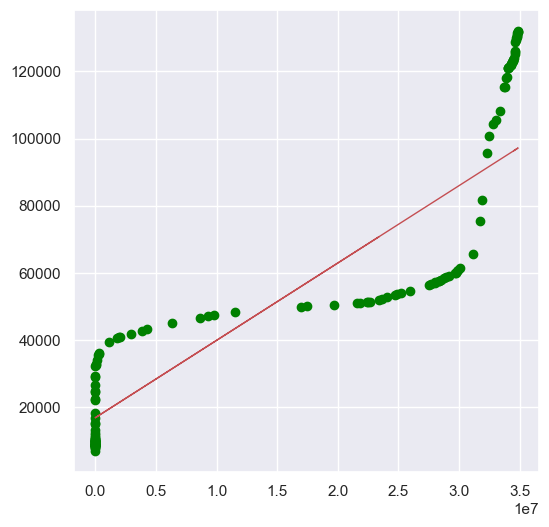

Explained Variance (R^2) 	: 0.8130821602546341
Mean Squared Error       	: 358161047.31



In [58]:
linreg_his = LinearRegression()
linreg_his.fit(X_his_train, y_his_train)        

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_his.intercept_)
print('Coefficients of Regression \t: a = ', linreg_his.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_his_train.columns, linreg_his.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_train_pred_his = linreg_his.predict(X_his_train)
y_test_pred_his = linreg_his.predict(X_his_test)

# Test Data set
f = plt.figure(figsize=(6, 6))
plt.scatter(X_his_test, y_his_test, color = "green", label = 'Actual Data')
plt.plot(X_his_test.squeeze(), y_test_pred_his.squeeze(), 'r', linewidth = 1, label = 'Test Predictions')
plt.show()
plt.legend()

# Goodness of Fit (on Test Data)
print("Explained Variance (R^2) \t:", linreg_his.score(X_his_test, y_his_test))
print('Mean Squared Error       \t:', round(metrics.mean_squared_error(y_his_test, y_test_pred_his), 2))
print()

As the linear regression has high Mean Squared Error and the data trend is not suitable for linear regression as it had dirrent parabilic trend, we have decided to implement Random Forest Regression. Random Forest is a type of supervised machine learning algorithm based on ensemble learning and it ombines multiple algorithm of the same type.

## Random Forest Regression for Hispanic

Mean Absolute Error: 1183.02
Mean Squared Error: 6544720.64
Root Mean Squared Error: 2558.27


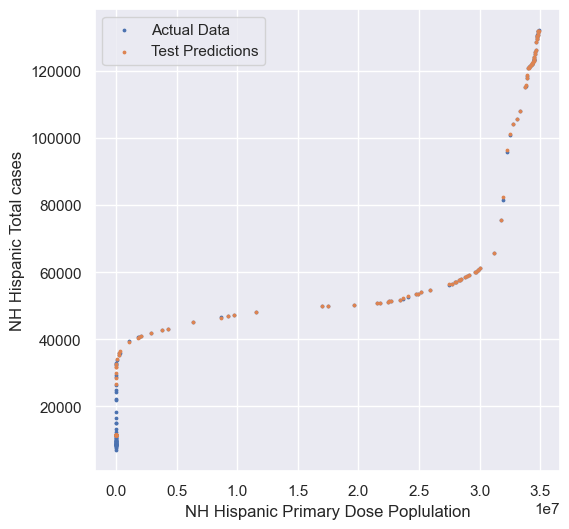

In [27]:
rf_his = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
# np.ravel to convert 2d array to 1d array
rf_his.fit(X_his_train, np.ravel(y_his_train));

y_his_pred = rf_his.predict(X_his_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_his_test, y_his_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_his_test, y_his_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_his_test, y_his_pred)), 2))

f = plt.figure(figsize=(6, 6))
plt.scatter(X_his_test, y_his_test, s = 3, label = 'Actual Data')
plt.scatter(X_his_test, y_his_pred, s = 3, label = 'Test Predictions')
plt.legend()
plt.xlabel('NH Hispanic Primary Dose Poplulation'); plt.ylabel('NH Hispanic Total cases');

In [41]:
errors = abs(round(metrics.mean_absolute_error(y_his_test, y_his_pred), 2))
# Calculate mean absolute percentage error (MAPE)
mape = (100 * errors / np.ravel(y_his_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy from Random Forest Regression:', round(accuracy, 2), '%.')

Accuracy from Random Forest Regression: 94.89 %.


If we compare the mean squared error values from both models, Linear Regression returned 358161047.31 while Random Forest Regression returned 6544720.64. Hence, the Random Forest Regression is more suitable method to predict the values to obtain better results and prediction.

## Random Forest Regression for NH Black

In [77]:
y_bl = pd.DataFrame(merged_black['Total cases'])
X_bl = pd.DataFrame(merged_black['Series_Complete_Yes'])

X_bl_train, X_bl_test, y_bl_train, y_bl_test = train_test_split(X_bl, y_bl, test_size = 0.25, random_state = 42)

In [81]:
print(y_bl.mean())
print(X_bl.mean())
print("Mean based percentage: 0.00388025%")

Total cases    31181.510989
dtype: float64
Series_Complete_Yes    8.035949e+06
dtype: float64
Mean based percentage: 0.00341084%


Intercept of Regression 	: b =  [7331.20640977]
Coefficients of Regression 	: a =  [[0.00289971]]



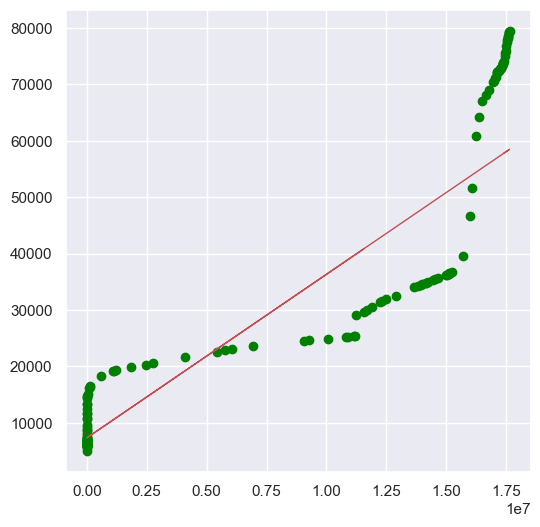

Explained Variance (R^2) 	: 0.8320077277778427
Mean Squared Error       	: 119896184.4



In [78]:
linreg_bl = LinearRegression()
linreg_bl.fit(X_bl_train, y_bl_train)        

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_bl.intercept_)
print('Coefficients of Regression \t: a = ', linreg_bl.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_bl_train.columns, linreg_bl.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_test_pred_bl = linreg_bl.predict(X_bl_test)

f = plt.figure(figsize=(6, 6))
plt.scatter(X_bl_test, y_bl_test, color = "green", label = 'Actual Data')
plt.plot(X_bl_test.squeeze(), y_test_pred_bl.squeeze(), 'r', linewidth = 1, label = 'Test Predictions')
plt.show()
plt.legend()

# Goodness of Fit (on Test Data)
print("Explained Variance (R^2) \t:", (linreg_bl.score(X_bl_test, y_bl_test)))
print('Mean Squared Error       \t:', round(metrics.mean_squared_error(y_bl_test, y_test_pred_bl), 2))
print()

Mean Absolute Error: 455.4
Mean Squared Error: 879502.59
Root Mean Squared Error: 937.82


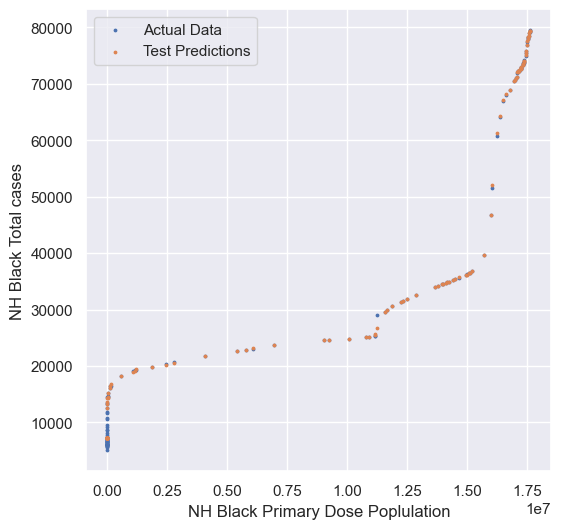

In [18]:
# Instantiate model with 1000 decision trees
rf_bl = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
# np.ravel to convert 2d array to 1d array
rf_bl.fit(X_bl_train, np.ravel(y_bl_train));

y_bl_pred = rf_bl.predict(X_bl_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_bl_test, y_bl_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_bl_test, y_bl_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_bl_test, y_bl_pred)), 2))

f = plt.figure(figsize=(6, 6))
plt.scatter(X_bl_test, y_bl_test, s = 3, label = 'Actual Data')
plt.scatter(X_bl_test, y_bl_pred, s = 3, label = 'Test Predictions')
plt.legend()
plt.xlabel('NH Black Primary Dose Poplulation'); plt.ylabel('NH Black Total cases');

In [43]:
errors = abs(round(metrics.mean_absolute_error(y_bl_test, y_bl_pred), 2))
# Calculate mean absolute percentage error (MAPE)
mape = (100 * errors / np.ravel(y_bl_pred))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy of Random Forest Regression:', round(accuracy, 2), '%.')

Accuracy from Random Forest Regression: 96.99 %.


## Random Forest Regression for NH White

In [25]:
y_wh = pd.DataFrame(merged_white['Total cases'])
X_wh = pd.DataFrame(merged_white['Series_Complete_Yes'])

X_wh_train, X_wh_test, y_wh_train, y_wh_test = train_test_split(X_wh, y_wh, test_size = 0.25, random_state = 42)

In [28]:
print(y_wh.mean())
print(X_wh.mean())
print("Mean based percentage: 0.002875%")

Total cases    142214.075092
dtype: float64
Series_Complete_Yes    4.946308e+07
dtype: float64
Mean based percentage: 0.002875%


Intercept of Regression 	: b =  [19849.42036239]
Coefficients of Regression 	: a =  [[0.00239488]]



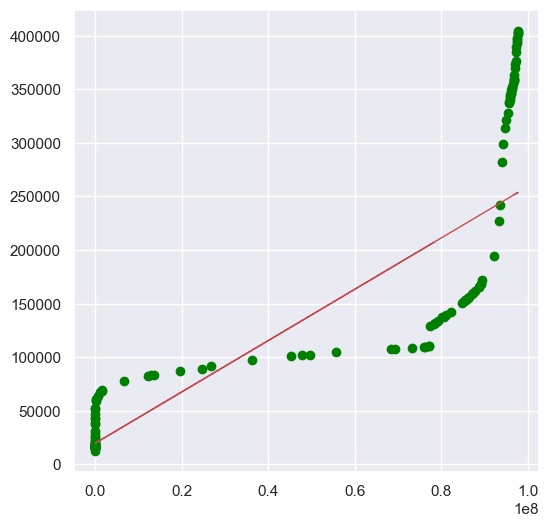

Explained Variance (R^2) 	: 0.7415662957778306
Mean Squared Error       	: 4826688745.78



In [63]:
linreg_wh = LinearRegression()
linreg_wh.fit(X_wh_train, y_wh_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_wh.intercept_)
print('Coefficients of Regression \t: a = ', linreg_wh.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_wh_train.columns, linreg_bl.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_test_pred_wh = linreg_wh.predict(X_wh_test)

f = plt.figure(figsize=(6, 6))
plt.scatter(X_wh_test, y_wh_test, color = "green", label = 'Actual Data')
plt.plot(X_wh_test.squeeze(), y_test_pred_wh.squeeze(), 'r', linewidth = 1, label = 'Test Predictions')
plt.show()
plt.legend()

# Goodness of Fit (on Test Data)
print("Explained Variance (R^2) \t:", (linreg_wh.score(X_wh_test, y_wh_test)))
print('Mean Squared Error       \t:', round(metrics.mean_squared_error(y_wh_test, y_test_pred_wh), 2))
print()

Mean Absolute Error: 102225.99
Mean Squared Error: 23035269964.73
Root Mean Squared Error: 151773.75


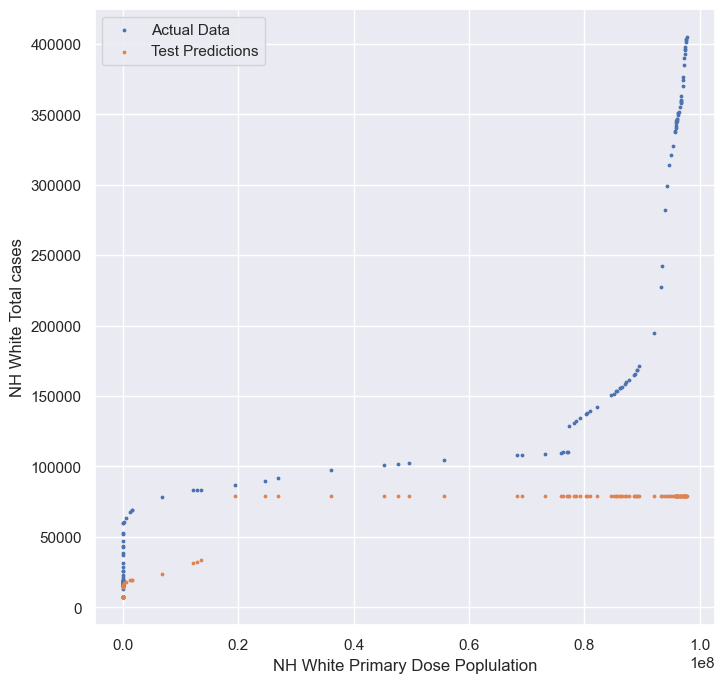

In [21]:
# Instantiate model with 1000 decision trees
rf_wh = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
# np.ravel to convert 2d array to 1d array
rf_wh.fit(X_wh_train, np.ravel(y_wh_train));

y_wh_pred = rf_bl.predict(X_wh_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_wh_test, y_wh_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_wh_test, y_wh_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_wh_test, y_wh_pred)), 2))

f = plt.figure(figsize=(8, 8))
plt.scatter(X_wh_test, y_wh_test, s = 3, label = 'Actual Data')
plt.scatter(X_wh_test, y_wh_pred, s = 3, label = 'Test Predictions')
plt.legend()
plt.xlabel('NH White Primary Dose Poplulation'); plt.ylabel('NH White Total cases');

In [75]:
errors = abs(round(metrics.mean_absolute_error(y_wh_test, y_wh_pred), 2))
# # Calculate mean absolute percentage error (MAPE)
mape = (100 * errors / np.ravel(y_wh_test))
# Calculate and display accuracy
accuracy = (100 - np.mean(mape))
print('Accuracy from Random Forest Regression:', round(accuracy, 2), '%.')

Accuracy from Random Forest Regression: -126.8 %.


## Random Forest Regression for NH Unknown

In [30]:
y_ukn = pd.DataFrame(merged_unknown['Total cases'])
X_ukn = pd.DataFrame(merged_unknown['Series_Complete_Yes'])

X_ukn_train, X_ukn_test, y_ukn_train, y_ukn_test = train_test_split(X_ukn, y_ukn, test_size = 0.25, random_state = 42)

In [32]:
print(y_ukn.mean())
print(X_ukn.mean())
print("Mean based percentage: 0.003995%")

Total cases    97445.615385
dtype: float64
Series_Complete_Yes    2.439371e+07
dtype: float64
Mean based percentage: 0.003995%


Intercept of Regression 	: b =  [39085.35590211]
Coefficients of Regression 	: a =  [[0.00239197]]



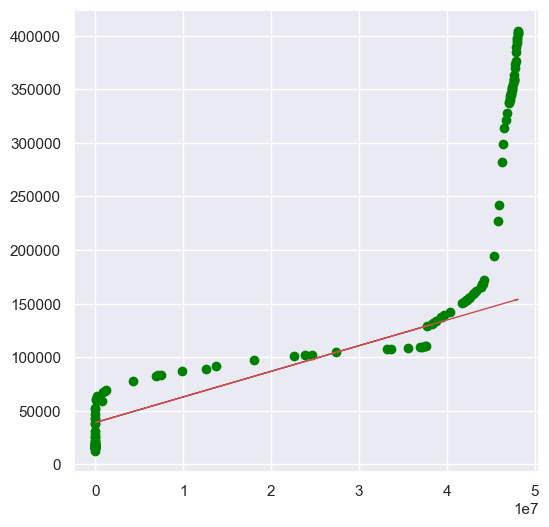

Explained Variance (R^2) 	: 0.8199567036162452
Mean Squared Error       	: 690554945.64



In [65]:
linreg_ukn = LinearRegression()
linreg_ukn.fit(X_ukn_train, y_ukn_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_ukn.intercept_)
print('Coefficients of Regression \t: a = ', linreg_ukn.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_ukn_train.columns, linreg_ukn.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_test_pred_ukn = linreg_ukn.predict(X_ukn_test)

f = plt.figure(figsize=(6, 6))
plt.scatter(X_ukn_test, y_wh_test, color = "green", label = 'Actual Data')
plt.plot(X_ukn_test.squeeze(), y_test_pred_ukn.squeeze(), 'r', linewidth = 1, label = 'Test Predictions')
plt.show()
plt.legend()

# Goodness of Fit (on Test Data)
print("Explained Variance (R^2) \t:", (linreg_ukn.score(X_ukn_test, y_ukn_test)))
print('Mean Squared Error       \t:', round(metrics.mean_squared_error(y_ukn_test, y_test_pred_ukn), 2))
print()

Mean Absolute Error: 2796.03
Mean Squared Error: 40262519.78
Root Mean Squared Error: 6345.28


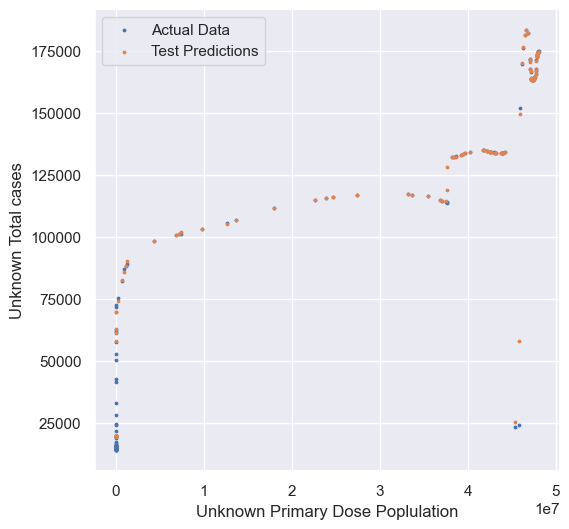

In [24]:
# Instantiate model with 1000 decision trees
rf_ukn = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
# np.ravel to convert 2d array to 1d array
rf_ukn.fit(X_ukn_train, np.ravel(y_ukn_train));

y_ukn_pred = rf_ukn.predict(X_ukn_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_ukn_test, y_ukn_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_ukn_test, y_ukn_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_ukn_test, y_ukn_pred)), 2))

f = plt.figure(figsize=(6, 6))
plt.scatter(X_ukn_test, y_ukn_test, s = 3, label = 'Actual Data')
plt.scatter(X_ukn_test, y_ukn_pred, s = 3, label = 'Test Predictions')
plt.legend()
plt.xlabel('Unknown Primary Dose Poplulation'); plt.ylabel('Unknown Total cases');

In [25]:
errors = abs(round(metrics.mean_absolute_error(y_ukn_test, y_ukn_pred), 2))
# Calculate mean absolute percentage error (MAPE)
mape = (100 * errors / np.ravel(y_ukn_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy from Random Forest Regression:', round(accuracy, 2), '%.')

Accuracy: 92.88 %.


## Random Forest Regression for NH Multiracial

In [33]:
y_mr = pd.DataFrame(merged_multiracial['Total cases'])
X_mr = pd.DataFrame(merged_multiracial['Series_Complete_Yes'])

X_mr_train, X_mr_test, y_mr_train, y_mr_test = train_test_split(X_mr, y_mr, test_size = 0.25, random_state = 42)

In [35]:
print(y_mr.mean())
print(X_mr.mean())
print("Mean based percentage: 0.0045355%")

Total cases    9239.592661
dtype: float64
Series_Complete_Yes    2.037310e+06
dtype: float64
Mean based percentage: 0.0045355%


Intercept of Regression 	: b =  [5962.29273692]
Coefficients of Regression 	: a =  [[0.00175881]]



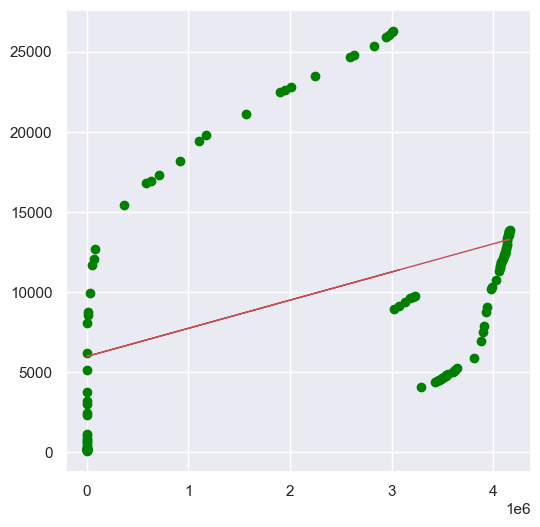

Explained Variance (R^2) 	: 0.22853145682256737
Mean Squared Error       	: 42126456.12



In [68]:
linreg_mr = LinearRegression()
linreg_mr.fit(X_mr_train, y_mr_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_mr.intercept_)
print('Coefficients of Regression \t: a = ', linreg_mr.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_mr_train.columns, linreg_mr.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_test_pred_mr = linreg_mr.predict(X_mr_test)

f = plt.figure(figsize=(6, 6))
plt.scatter(X_mr_test, y_mr_test, color = "green", label = 'Actual Data')
plt.plot(X_mr_test.squeeze(), y_test_pred_mr.squeeze(), 'r', linewidth = 1, label = 'Test Predictions')
plt.show()
plt.legend()

# Goodness of Fit (on Test Data)
print("Explained Variance (R^2) \t:", (linreg_mr.score(X_mr_test, y_mr_test)))
print('Mean Squared Error       \t:', round(metrics.mean_squared_error(y_mr_test, y_test_pred_mr), 2))
print()

Mean Absolute Error: 349.83
Mean Squared Error: 1507843.42
Root Mean Squared Error: 1227.94


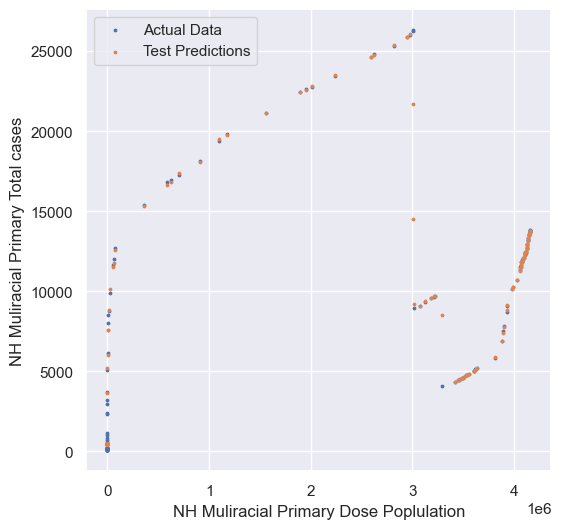

In [19]:
# Instantiate model with 1000 decision trees
rf_mr = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
# np.ravel to convert 2d array to 1d array
rf_mr.fit(X_mr_train, np.ravel(y_mr_train));

y_mr_pred = rf_mr.predict(X_mr_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_mr_test, y_mr_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_mr_test, y_mr_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_mr_test, y_mr_pred)), 2))

f = plt.figure(figsize=(6, 6))
plt.scatter(X_mr_test, y_mr_test, s = 3, label = 'Actual Data')
plt.scatter(X_mr_test, y_mr_pred, s = 3, label = 'Test Predictions')
plt.legend()
plt.xlabel('NH Muliracial Primary Dose Poplulation'); plt.ylabel('NH Muliracial Primary Total cases');

In [86]:
errors = abs(round(metrics.mean_absolute_error(y_mr_test, y_mr_pred), 2))
# Calculate mean absolute percentage error (MAPE)
mape = (100 * errors / np.ravel(y_mr_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy of Random Forest Regression:', round(accuracy, 2), '%.')

Accuracy of Random Forest Regression: 32.82 %.


## Random Forest Regression for NH Asian

In [36]:
y_asi = pd.DataFrame(merged_asian['Total cases'])
X_asi = pd.DataFrame(merged_asian['Series_Complete_Yes'])

X_asi_train, X_asi_test, y_asi_train, y_asi_test = train_test_split(X_asi, y_asi, test_size = 0.25, random_state = 42)

In [38]:
print(y_asi.mean())
print(X_asi.mean())
print("Mean based percentage: 0.001051%")

Total cases    5809.97451
dtype: float64
Series_Complete_Yes    5.529938e+06
dtype: float64
Mean based percentage: 0.001051%


Intercept of Regression 	: b =  [746.69226388]
Coefficients of Regression 	: a =  [[0.00090185]]



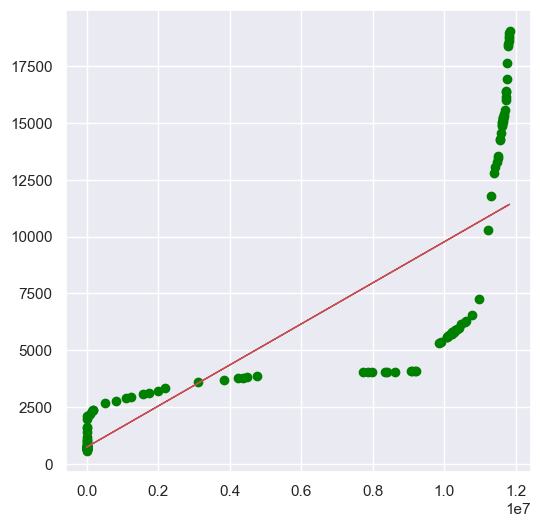

Explained Variance (R^2) 	: 0.7079528816149825
Mean Squared Error       	: 10776696.35



In [70]:
linreg_asi = LinearRegression()
linreg_asi.fit(X_asi_train, y_asi_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_asi.intercept_)
print('Coefficients of Regression \t: a = ', linreg_asi.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_asi_train.columns, linreg_asi.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_test_pred_asi = linreg_asi.predict(X_asi_test)

f = plt.figure(figsize=(6, 6))
plt.scatter(X_asi_test, y_asi_test, color = "green", label = 'Actual Data')
plt.plot(X_asi_test.squeeze(), y_test_pred_asi.squeeze(), 'r', linewidth = 1, label = 'Test Predictions')
plt.show()
plt.legend()

# Goodness of Fit (on Test Data)
print("Explained Variance (R^2) \t:", (linreg_asi.score(X_asi_test, y_asi_test)))
print('Mean Squared Error       \t:', round(metrics.mean_squared_error(y_asi_test, y_test_pred_asi), 2))
print()

Mean Absolute Error: 72.69
Mean Squared Error: 19543.03
Root Mean Squared Error: 139.8


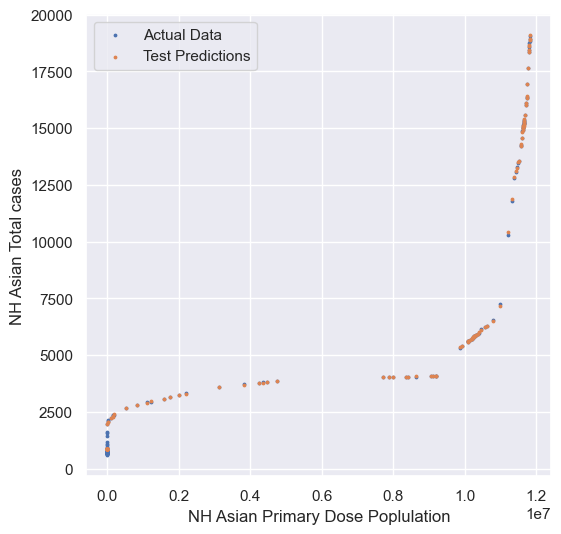

In [108]:
# Instantiate model with 1000 decision trees
rf_asi = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
# np.ravel to convert 2d array to 1d array
rf_asi.fit(X_asi_train, np.ravel(y_asi_train));

y_asi_pred = rf_asi.predict(X_asi_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_asi_test, y_asi_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_asi_test, y_asi_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_asi_test, y_asi_pred)), 2))

f = plt.figure(figsize=(6, 6))
plt.scatter(X_asi_test, y_asi_test, s = 3, label = 'Actual Data')
plt.scatter(X_asi_test, y_asi_pred, s = 3, label = 'Test Predictions')
plt.legend()
plt.xlabel('NH Asian Primary Dose Poplulation'); plt.ylabel('NH Asian Total cases');

In [124]:
errors = abs(round(metrics.mean_absolute_error(y_asi_test, y_asi_pred), 2))
# Calculate mean absolute percentage error (MAPE)
mape = (100 * errors / np.ravel(y_asi_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy from Random Forest Regression:', round(accuracy, 2), '%.')

Accuracy: 96.12 %.


## Random Forest Regression for NH Others

In [39]:
y_ot = pd.DataFrame(merged_other['Total cases'])
X_ot = pd.DataFrame(merged_other['Series_Complete_Yes'])

X_ot_train, X_ot_test, y_ot_train, y_ot_test = train_test_split(X_ot, y_ot, test_size = 0.25, random_state = 42)

In [41]:
print(y_ot.mean())
print(X_ot.mean())
print("Mean based percentage: 0.007558%")

Total cases    7901.335505
dtype: float64
Series_Complete_Yes    1.046164e+06
dtype: float64
Mean based percentage: 0.007558%


Intercept of Regression 	: b =  [3653.37129965]
Coefficients of Regression 	: a =  [[0.00412412]]



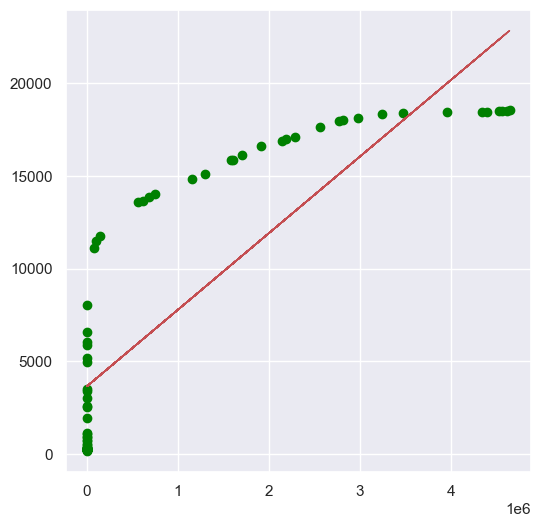

Explained Variance (R^2) 	: 0.7268629143705798
Mean Squared Error       	: 15407078.87



In [73]:
linreg_ot = LinearRegression()
linreg_ot.fit(X_ot_train, y_ot_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_ot.intercept_)
print('Coefficients of Regression \t: a = ', linreg_ot.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_ot_train.columns, linreg_asi.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_test_pred_ot = linreg_ot.predict(X_ot_test)

f = plt.figure(figsize=(6, 6))
plt.scatter(X_ot_test, y_ot_test, color = "green", label = 'Actual Data')
plt.plot(X_ot_test.squeeze(), y_test_pred_ot.squeeze(), 'r', linewidth = 1, label = 'Test Predictions')
plt.show()

# Goodness of Fit (on Test Data)
print("Explained Variance (R^2) \t:", (linreg_ot.score(X_ot_test, y_ot_test)))
print('Mean Squared Error       \t:', round(metrics.mean_squared_error(y_ot_test, y_test_pred_ot), 2))
print()

Mean Absolute Error: 500.59
Mean Squared Error: 929787.83
Root Mean Squared Error: 964.26


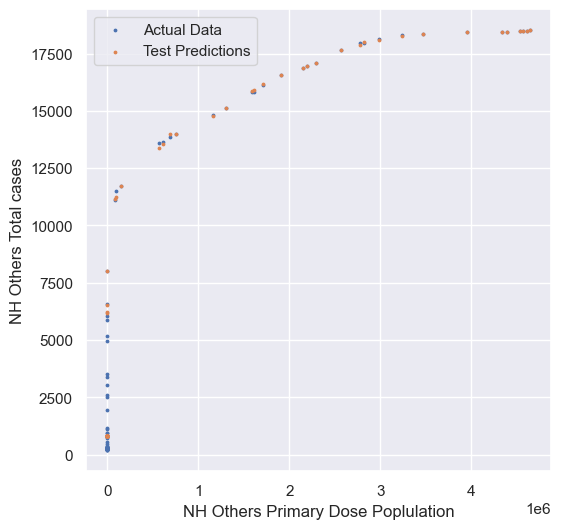

In [72]:
# Instantiate model with 1000 decision trees
rf_ot = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
# np.ravel to convert 2d array to 1d array
rf_ot.fit(X_ot_train, np.ravel(y_ot_train));

y_ot_pred = rf_ot.predict(X_ot_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_ot_test, y_ot_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_ot_test, y_ot_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_ot_test, y_ot_pred)), 2))

f = plt.figure(figsize=(6, 6))
plt.scatter(X_ot_test, y_ot_test, s = 3, label = 'Actual Data')
plt.scatter(X_ot_test, y_ot_pred, s = 3, label = 'Test Predictions')
plt.legend()
plt.xlabel('NH Others Primary Dose Poplulation'); plt.ylabel('NH Others Total cases');

In [76]:
errors = abs(round(metrics.mean_absolute_error(y_ot_test, y_ot_pred), 2))
# Calculate mean absolute percentage error (MAPE)
mape = (100 * errors / np.ravel(y_ot_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy from Random Forest Regression:', round(accuracy, 2), '%.')

Accuracy from Random Forest Regression: 21.89 %.


Based on the above regression results obtained, due to the various data trends of the actual data, Linear Regression was not the best way of training and testing our AI model. With the below reasons, Random Forest Regression is more suitable.

1) The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.

2) It is a stable algorithm despite including a new data.

With the aid of Random Forest Regression, our AI model has predicted the positive cases against the population with full-dose with respect to various race.   